In [341]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [342]:
df = pd.read_csv("preprocessed_redditData-removedtopic.csv")

In [343]:
analyzer = SentimentIntensityAnalyzer()

df['text'] = df['text'].astype(str)

df['vader_score'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def label_sentiment(score):
    if score >= 0.01:
        return 'positive'
    elif score <= -0.005:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_score'].apply(label_sentiment)

In [344]:
sentiment_counts = df.groupby(['subreddit', 'year', 'vader_sentiment']) \
                     .size().reset_index(name='count')

In [345]:
sentiment_by_year = df.groupby('year')['vader_score'].mean().reset_index()


In [346]:
# Optional: sort for consistency
sentiment_counts = sentiment_counts.sort_values(by=['year', 'vader_sentiment'])

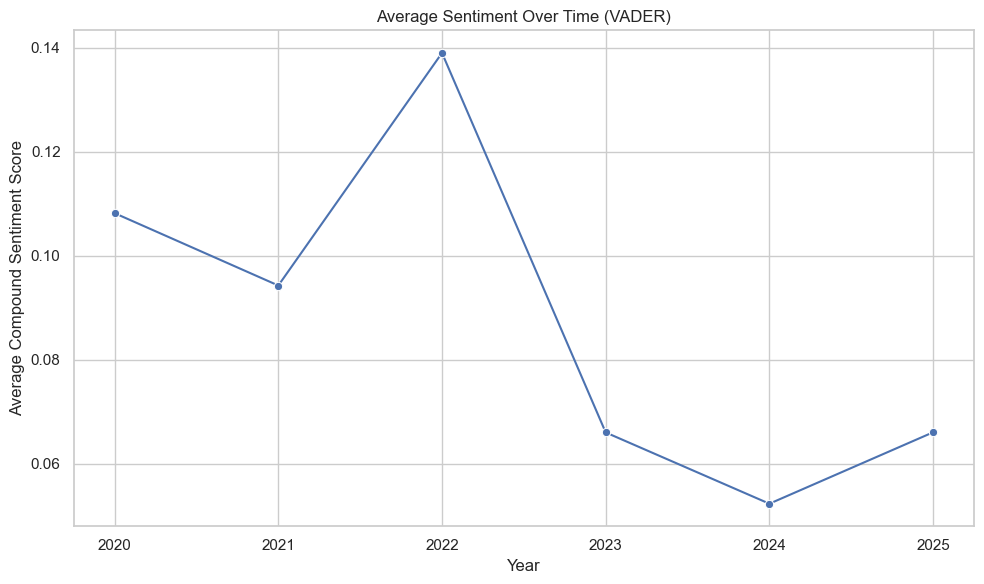

In [347]:


plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_by_year, x='year', y='vader_score', marker='o')
plt.title("Average Sentiment Over Time (VADER)")
plt.xlabel("Year")
plt.ylabel("Average Compound Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()

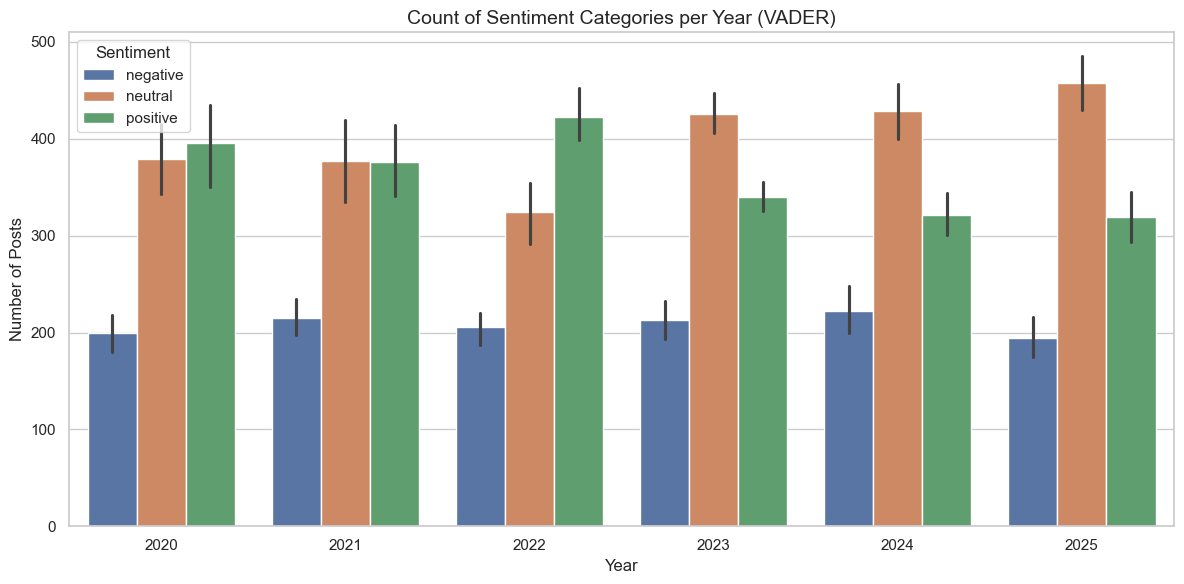

In [348]:
# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts, x='year', y='count', hue='vader_sentiment')

# Customize plot
plt.title('Count of Sentiment Categories per Year (VADER)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [349]:
# Group by subreddit (game) and year, then calculate average score and distribution
sentiment_summary = df.groupby(['subreddit', 'year']).agg(
    avg_vader_score=('vader_score', 'mean'),
    num_posts=('vader_score', 'count'),
    num_positive=('vader_sentiment', lambda x: (x == 'positive').sum()),
    num_negative=('vader_sentiment', lambda x: (x == 'negative').sum()),
    num_neutral=('vader_sentiment', lambda x: (x == 'neutral').sum())
).reset_index()

In [350]:
print(sentiment_summary)

     subreddit  year  avg_vader_score  num_posts  num_positive  num_negative  \
0   callofduty  2020         0.052367        984           370           252   
1   callofduty  2021         0.029202        975           320           258   
2   callofduty  2022         0.058372        907           359           254   
3   callofduty  2023         0.024688        988           306           257   
4   callofduty  2024        -0.009011        981           268           277   
..         ...   ...              ...        ...           ...           ...   
61    valorant  2021         0.088343        956           398           274   
62    valorant  2022         0.136156        951           423           231   
63    valorant  2023         0.025472        982           324           264   
64    valorant  2024         0.035436        987           335           249   
65    valorant  2025         0.099512        984           376           172   

    num_neutral  
0           362  
1  

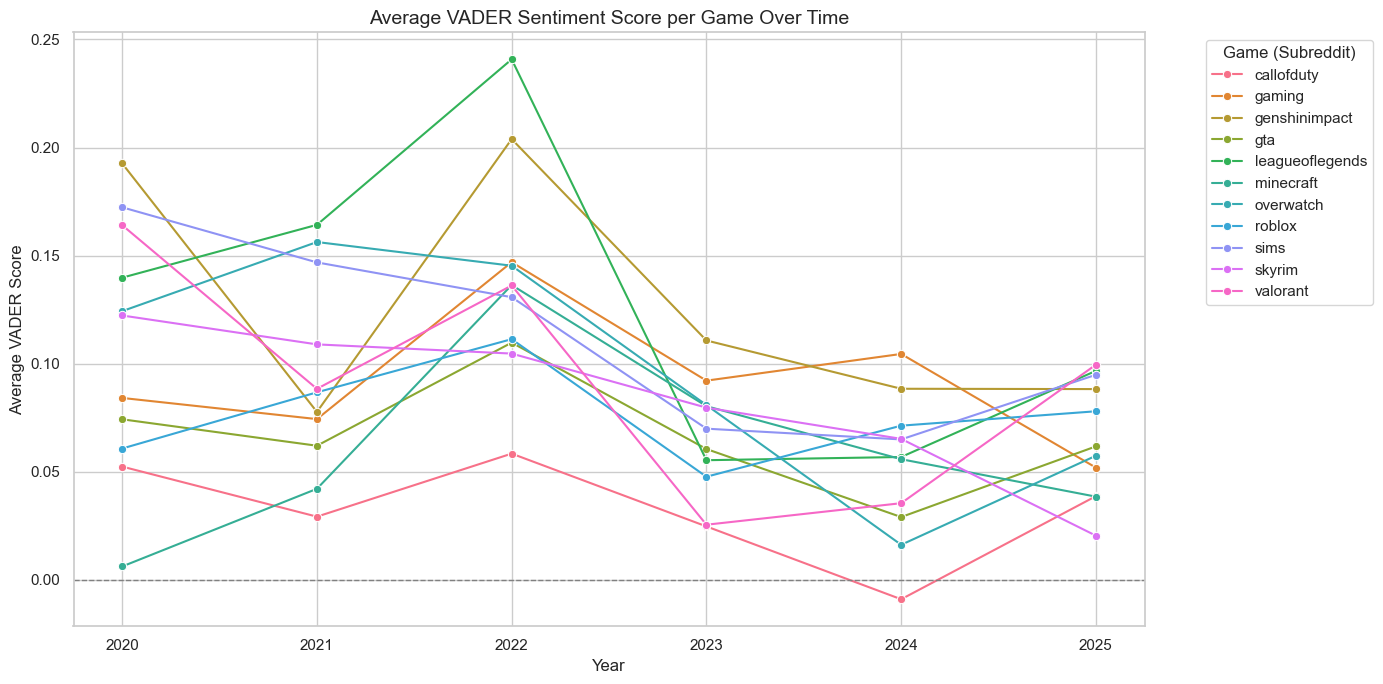

In [351]:
# Set up the plot style
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Create the lineplot
sns.lineplot(
    data=sentiment_summary,
    x='year',
    y='avg_vader_score',
    hue='subreddit',
    marker='o'
)

# Chart title and labels
plt.title("Average VADER Sentiment Score per Game Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average VADER Score")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title="Game (Subreddit)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

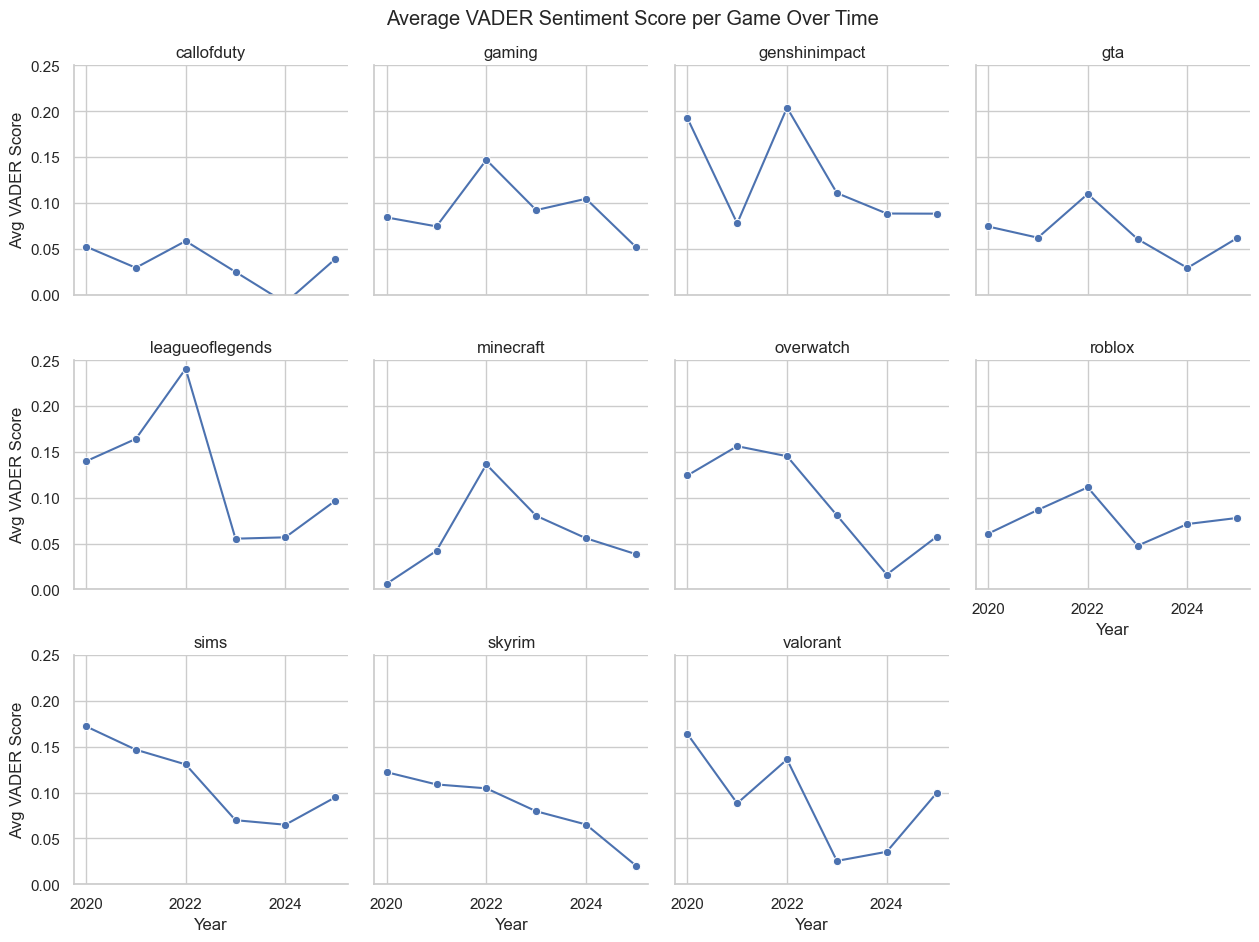

In [352]:


g = sns.FacetGrid(sentiment_summary, col="subreddit", col_wrap=4, height=3.2, sharey=True)
g.map_dataframe(sns.lineplot, x="year", y="avg_vader_score", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Avg VADER Score")
g.set(ylim=(0, 0.25))
plt.subplots_adjust(top=0.93)
g.fig.suptitle("Average VADER Sentiment Score per Game Over Time")
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

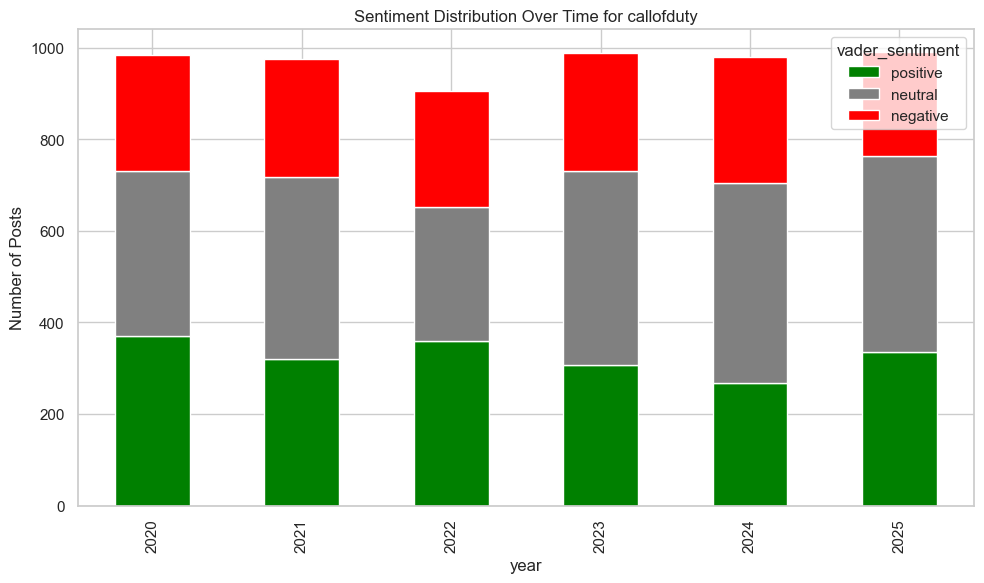

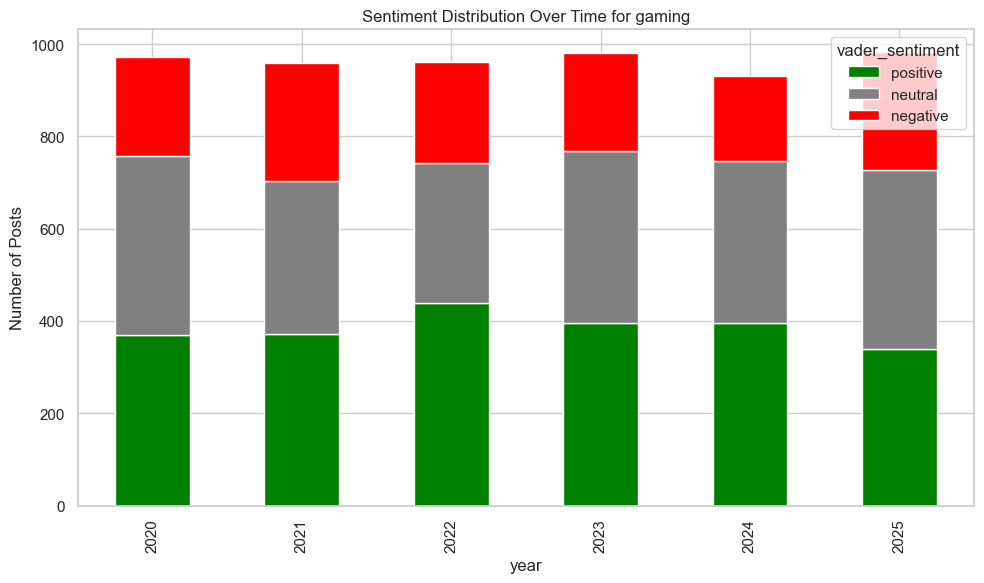

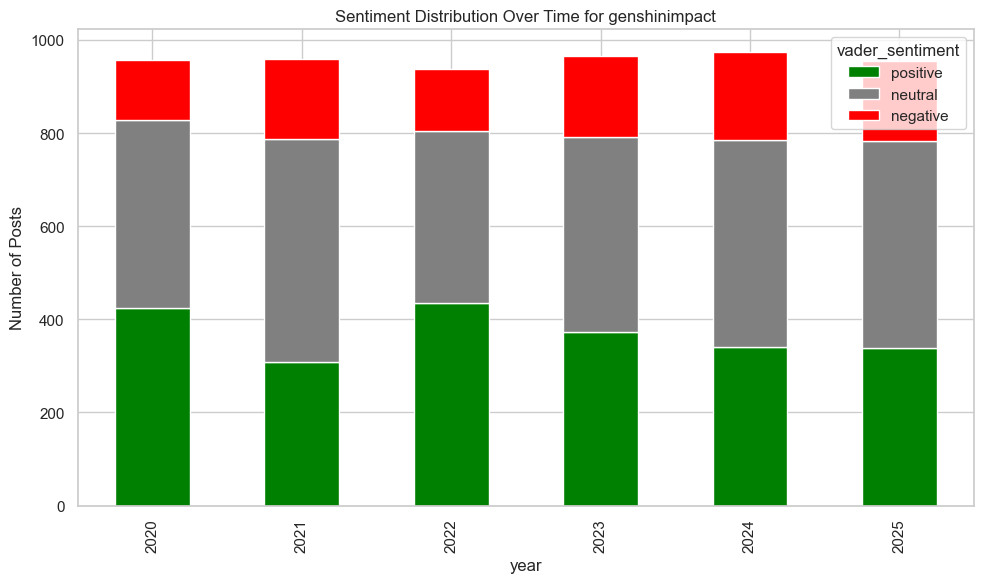

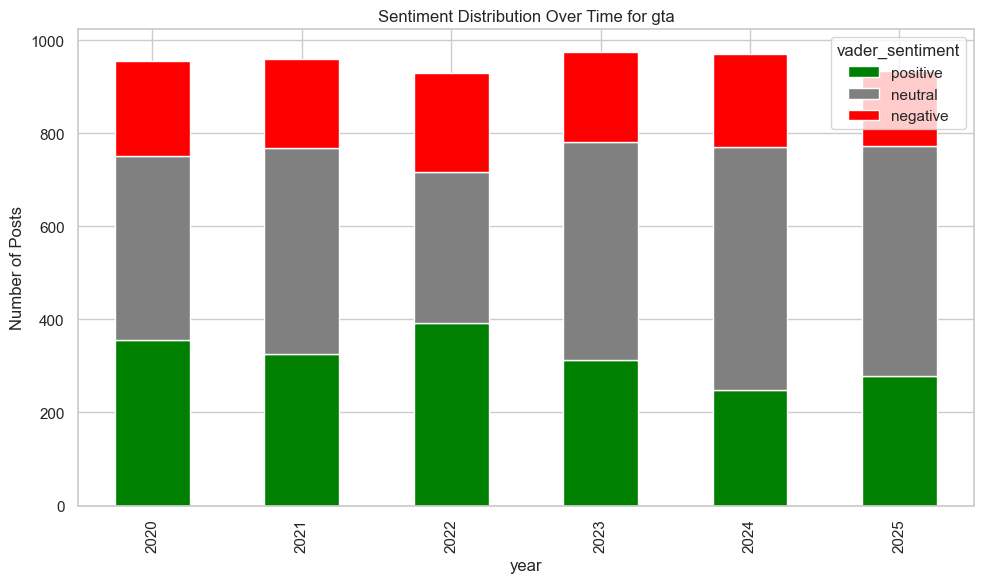

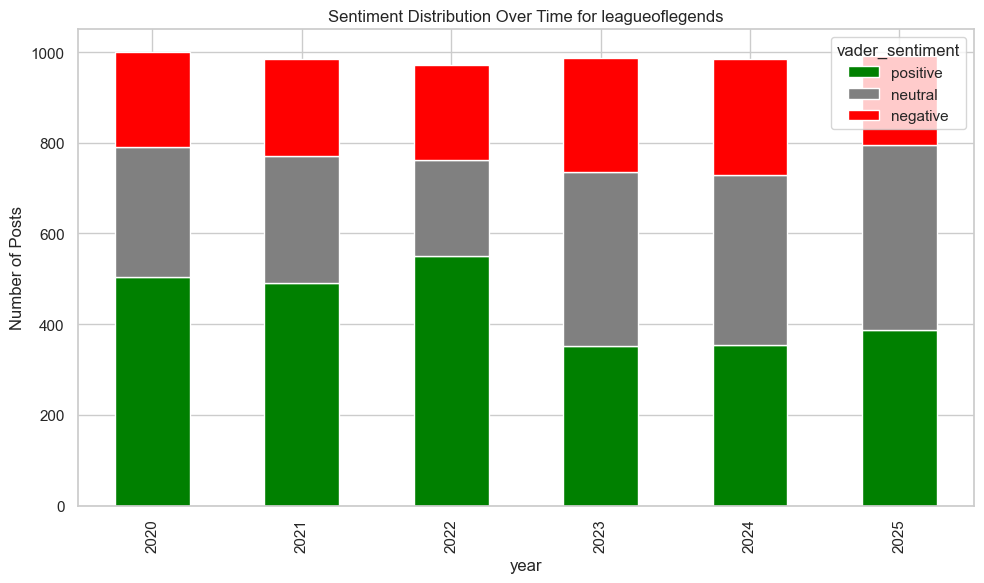

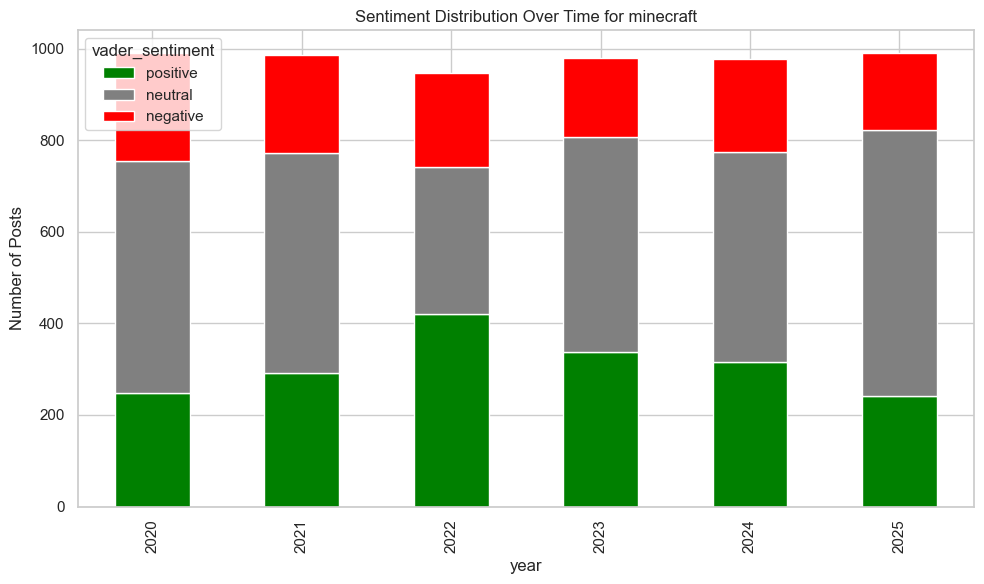

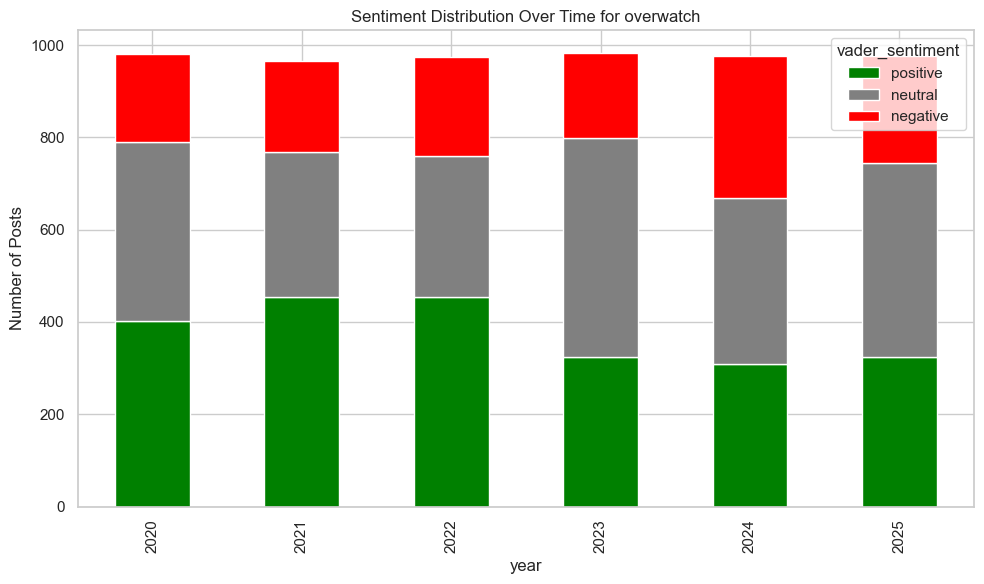

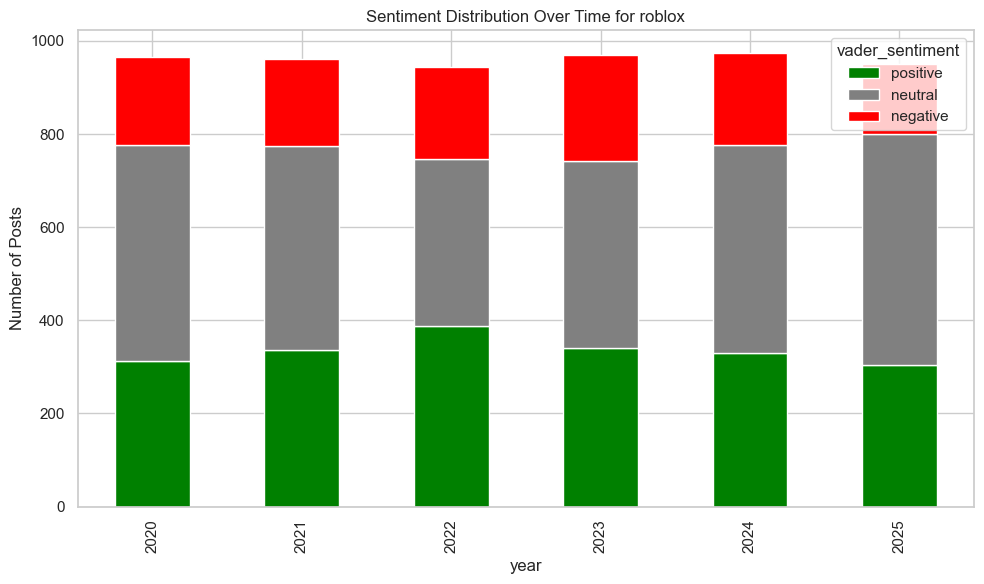

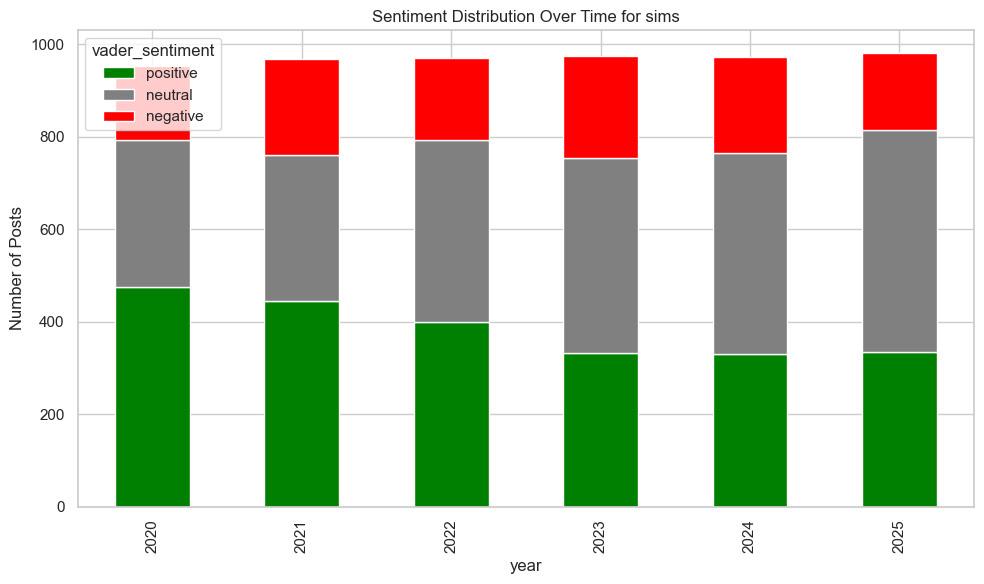

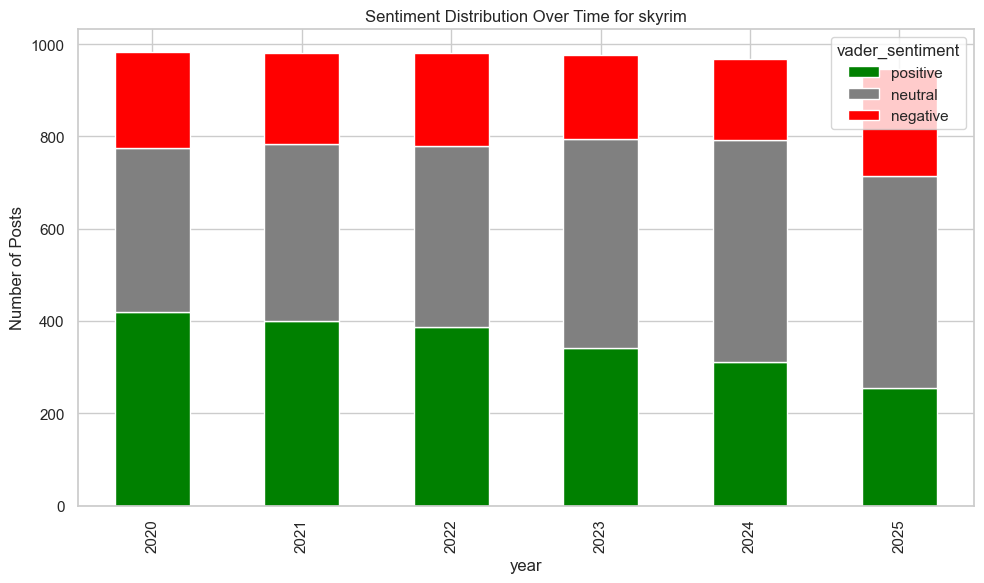

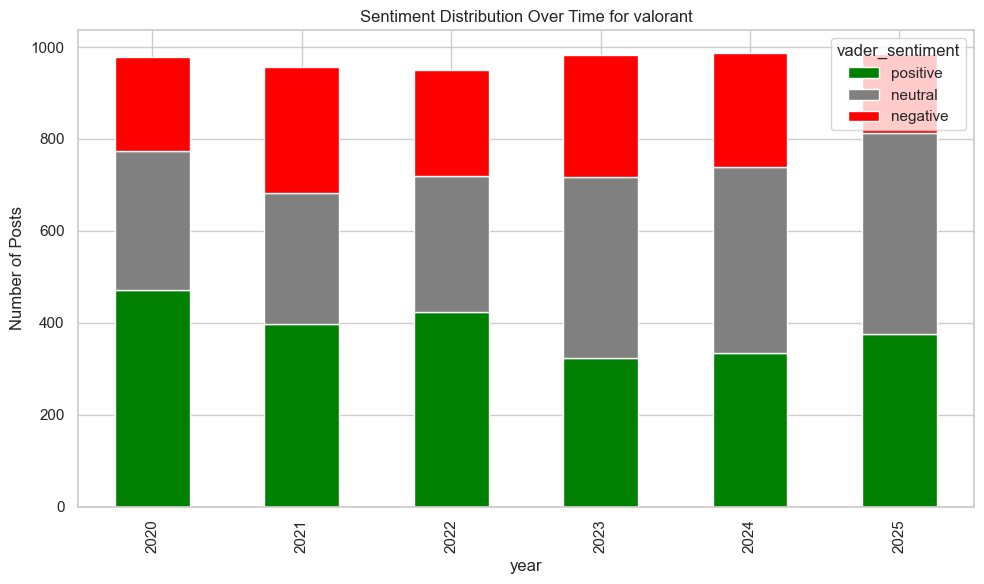

In [353]:
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Pivot for stacked bar plot
pivot_df = sentiment_counts.pivot_table(index=['subreddit', 'year'], 
                                        columns='vader_sentiment', 
                                        values='count', 
                                        fill_value=0).reset_index()

# Plot for each game
games = pivot_df['subreddit'].unique()
for game in games:
    game_df = pivot_df[pivot_df['subreddit'] == game]
    colors = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
    ax = game_df.set_index('year')[['positive', 'neutral', 'negative']].plot(
        kind='bar',
        stacked=True,
        color=[colors['positive'], colors['neutral'], colors['negative']],
        figsize=(10, 6),
        title=f"Sentiment Distribution Over Time for {game}",
        ylabel="Number of Posts"
    )
    plt.tight_layout()
    plt.show()

In [354]:
for game in sentiment_counts['subreddit'].unique():
    print(f"\n Sentiment Counts for {game}")
    game_df = sentiment_counts[sentiment_counts['subreddit'] == game]
    for year in sorted(game_df['year'].unique()):
        year_df = game_df[game_df['year'] == year]
        print(f"  Year {year}:")
        for sentiment in ['positive', 'neutral', 'negative']:
            count = year_df[year_df['vader_sentiment'] == sentiment]['count'].sum()
            print(f"    {sentiment.capitalize()}: {count}")


 Sentiment Counts for callofduty
  Year 2020:
    Positive: 370
    Neutral: 362
    Negative: 252
  Year 2021:
    Positive: 320
    Neutral: 397
    Negative: 258
  Year 2022:
    Positive: 359
    Neutral: 294
    Negative: 254
  Year 2023:
    Positive: 306
    Neutral: 425
    Negative: 257
  Year 2024:
    Positive: 268
    Neutral: 436
    Negative: 277
  Year 2025:
    Positive: 335
    Neutral: 429
    Negative: 227

 Sentiment Counts for gaming
  Year 2020:
    Positive: 369
    Neutral: 388
    Negative: 216
  Year 2021:
    Positive: 371
    Neutral: 333
    Negative: 256
  Year 2022:
    Positive: 440
    Neutral: 303
    Negative: 219
  Year 2023:
    Positive: 396
    Neutral: 373
    Negative: 212
  Year 2024:
    Positive: 396
    Neutral: 350
    Negative: 185
  Year 2025:
    Positive: 340
    Neutral: 387
    Negative: 256

 Sentiment Counts for genshinimpact
  Year 2020:
    Positive: 424
    Neutral: 404
    Negative: 128
  Year 2021:
    Positive: 309
    Neutra